In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pypose as pp

In [2]:
# Importing the dataset
label_file_dir = "/home/runyiy/workspace/CP6D/dataset/"
model = "PoseNet_results/"
name = "7Scenes_0.7/abs_7scenes_pose.csv_chess_train.csv_results.csv"
store_dir = "/home/runyiy/workspace/CP6D/experiments/visualization/pose_histograms/"

In [3]:
data = pd.read_csv(label_file_dir + model + name)
data

,scene,split,seq,img_path,t1,t2,t3,q1,q2,q3,q4,est_t1,est_t2,est_t3,est_q1,est_q2,est_q3,est_q4
0,chess,train,seq-01,chess/seq-01/frame-000006.color.png,-0.136446,-1.121368,-0.989138,0.995017,-0.097349,0.019804,0.008456,-0.237342,-1.249357,-1.119116,0.994084,-0.107117,0.016271,0.007631
1,chess,train,seq-01,chess/seq-01/frame-000007.color.png,-0.136953,-1.121169,-0.989437,0.995006,-0.097540,0.019666,0.007924,-0.226069,-1.247670,-1.112044,0.993857,-0.109303,0.015404,0.008042
2,chess,train,seq-01,chess/seq-01/frame-000009.color.png,-0.138858,-1.122363,-0.988528,0.994923,-0.098395,0.020162,0.006254,-0.209561,-1.231421,-1.124316,0.994154,-0.106705,0.014029,0.008707
3,chess,train,seq-01,chess/seq-01/frame-000010.color.png,-0.139146,-1.122790,-0.988054,0.994843,-0.099346,0.019948,0.004461,-0.209176,-1.214999,-1.118314,0.993976,-0.108409,0.014176,0.007685
4,chess,train,seq-01,chess/seq-01/frame-000013.color.png,-0.141581,-1.122006,-0.985416,0.994810,-0.099791,0.019346,0.004466,-0.257359,-1.219339,-1.091418,0.993453,-0.113083,0.015508,0.004711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,chess,train,seq-06,chess/seq-06/frame-000994.color.png,1.250549,-0.631714,0.581384,0.825355,-0.059114,-0.560122,-0.039474,1.429649,-0.655769,0.589831,0.820510,-0.048697,-0.568840,-0.028508
1991,chess,train,seq-06,chess/seq-06/frame-000995.color.png,1.248905,-0.628636,0.582062,0.823922,-0.060985,-0.562136,-0.037899,1.421761,-0.640567,0.611690,0.817831,-0.047537,-0.572843,-0.027260
1992,chess,train,seq-06,chess/seq-06/frame-000996.color.png,1.247085,-0.627599,0.584994,0.822399,-0.064016,-0.564111,-0.036624,1.398275,-0.642380,0.594022,0.813462,-0.052405,-0.578601,-0.027460
1993,chess,train,seq-06,chess/seq-06/frame-000998.color.png,1.243130,-0.621599,0.586572,0.819019,-0.067901,-0.568713,-0.034108,1.423657,-0.645497,0.629158,0.814401,-0.054580,-0.576658,-0.035173


In [4]:
x, y, z,qw, qx, qy, qz = data['t1'], data['t2'], data['t3'], data['q1'], data['q2'], data['q3'], data['q4']
est_x, est_y, est_z, est_qw, est_qx, est_qy, est_qz = data['est_t1'], data['est_t2'], data['est_t3'], data['est_q1'], data['est_q2'], data['est_q3'], data['est_q4']

In [5]:
from tools import *
# Transfer to totation angles
# Transfer quaternion to Euler angles
R = compute_rotation_matrix_from_quaternion(torch.tensor([qw, qx, qy, qz]).T)
est_R = compute_rotation_matrix_from_quaternion(torch.tensor([est_qw, est_qx, est_qy, est_qz]).T)

In [6]:
euler_angle = compute_euler_angles_from_rotation_matrices(R)
est_euler_angle = compute_euler_angles_from_rotation_matrices(est_R)

In [7]:
euler_angle = euler_angle.detach().cpu().numpy() * 180 / np.pi
est_euler_angle = est_euler_angle.detach().cpu().numpy() * 180 / np.pi

In [8]:
x, y, z = np.array(x), np.array(y), np.array(z)
x, y, z = (x - np.mean(x))/np.std(x), (y - np.mean(y))/np.std(y), (z - np.mean(z))/np.std(z)
roll, yaw, pitch = euler_angle[:, 0], euler_angle[:, 1], euler_angle[:, 2]

est_x, est_y, est_z = np.array(est_x), np.array(est_y), np.array(est_z)
est_x, est_y, est_z = (est_x - np.mean(est_x))/np.std(est_x), (est_y - np.mean(est_y))/np.std(est_y), (est_z - np.mean(est_z))/np.std(est_z)
est_roll, est_yaw, est_pitch = est_euler_angle[:, 0], est_euler_angle[:, 1], est_euler_angle[:, 2]

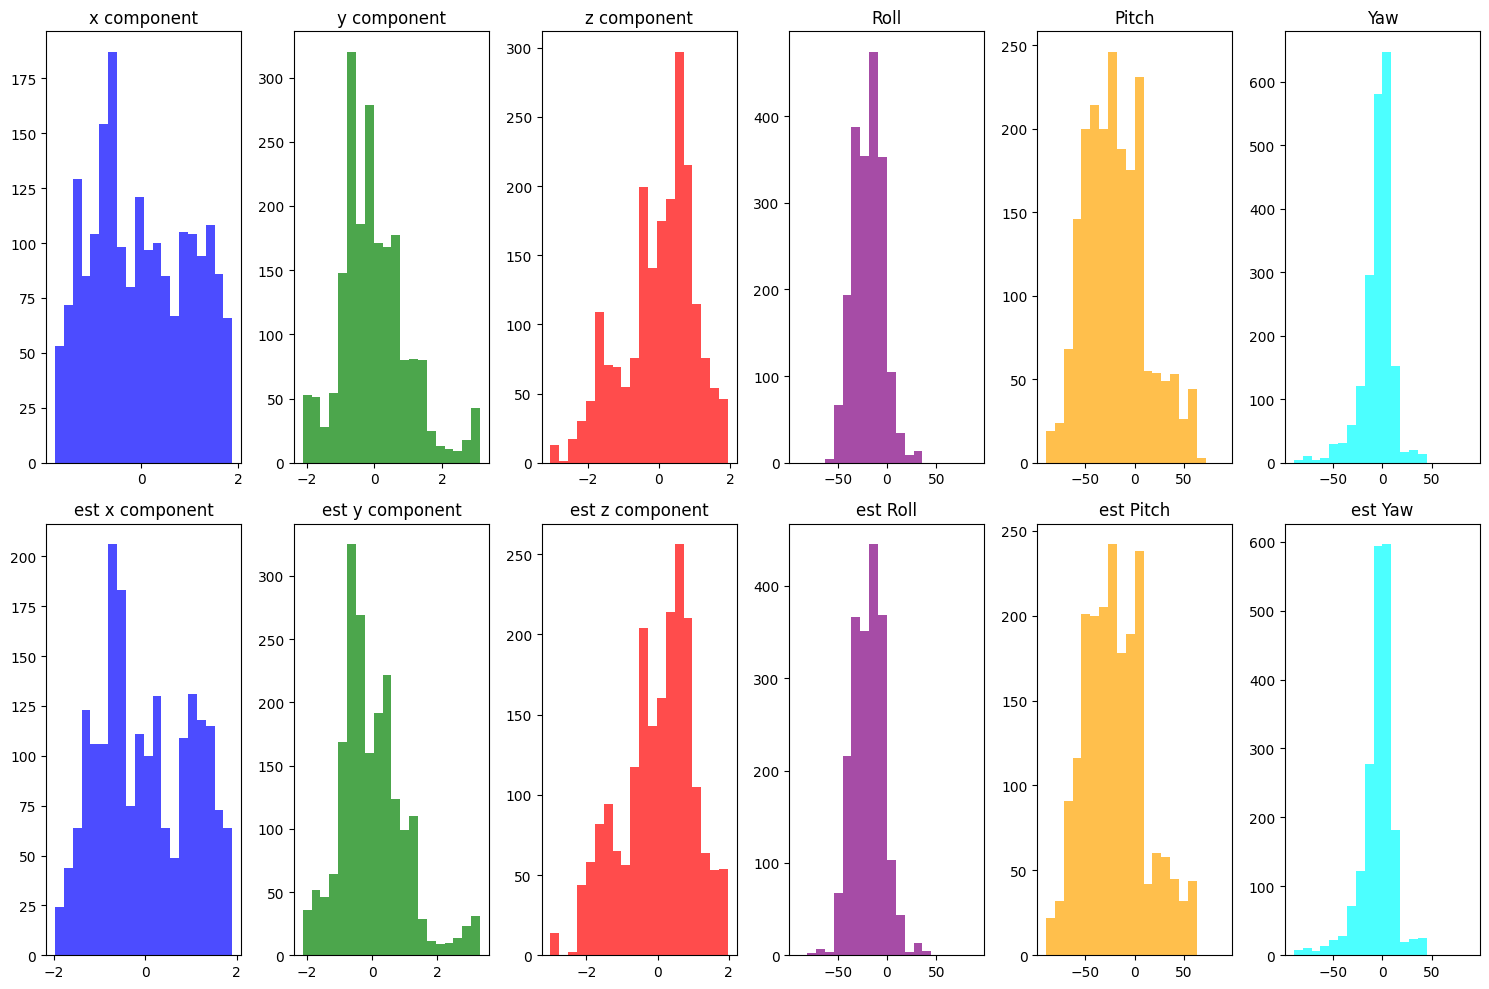

In [10]:
# Plot histograms
fig, axs = plt.subplots(2, 6, figsize=(15, 10))
# Plot histograms for x, y, z
axs[0, 0].hist(x, bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('x component')

axs[0, 1].hist(y, bins=20, color='green', alpha=0.7)
axs[0, 1].set_title('y component')

axs[0, 2].hist(z, bins=20, color='red', alpha=0.7)
axs[0, 2].set_title('z component')

# Plot histograms for roll, pitch, yaw
axs[0, 3].hist(roll, bins=20, range=(-90, 90), color='purple', alpha=0.7)
axs[0, 3].set_title('Roll')

axs[0, 4].hist(yaw, bins=20,range=(-90, 90), color='orange', alpha=0.7)
axs[0, 4].set_title('Pitch')

axs[0, 5].hist(pitch, bins=20,range=(-90, 90), color='cyan', alpha=0.7)
axs[0, 5].set_title('Yaw')

axs[1, 0].hist(est_x, bins=20, color='blue', alpha=0.7)
axs[1, 0].set_title('est x component')

axs[1, 1].hist(est_y, bins=20, color='green', alpha=0.7)
axs[1, 1].set_title('est y component')

axs[1, 2].hist(est_z, bins=20, color='red', alpha=0.7)
axs[1, 2].set_title('est z component')

# Plot histograms for roll, pitch, yaw
axs[1, 3].hist(est_roll, bins=20, range=(-90, 90), color='purple', alpha=0.7)
axs[1, 3].set_title('est Roll')

axs[1, 4].hist(est_yaw, bins=20,range=(-90, 90), color='orange', alpha=0.7)
axs[1, 4].set_title('est Pitch')

axs[1, 5].hist(est_pitch, bins=20,range=(-90, 90), color='cyan', alpha=0.7)
axs[1, 5].set_title('est Yaw')

plt.tight_layout()
plt.show()

array([-11.160403 ,   2.3530505,   0.7438393], dtype=float32)